In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [2]:
df = pd.read_csv('restaurant_data.csv')

In [3]:
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Cuisines    9
dtype: int64


In [4]:
df.dropna(subset=['Cuisines'], inplace=True)


In [5]:
# Select relevant features and the target variable
features = ['Cuisines','Average Cost for two', 'Price range', 'Votes', 'Has Table booking', 'Has Online delivery', 'Is delivering now']
target = 'Aggregate rating'

In [6]:
df_encoded = pd.get_dummies(df[features])

# Add the target variable
df_encoded[target] = df[target]


In [7]:
# Define the features (X) and target (y)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [8]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = regressor.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.1754293754729061
R-squared: 0.9233943630200344


In [11]:
# Save the model
joblib.dump(regressor, 'restaurant_rating_predictor.pkl')

# Save the columns used for one-hot encoding
joblib.dump(df_encoded.columns, 'model_columns.pkl')

['model_columns.pkl']

In [12]:
# Function to predict the aggregate rating based on user input features
def predict_rating(input_features):
    # Load the trained model
    model = joblib.load('restaurant_rating_predictor.pkl')
    
    # Load the columns used for one-hot encoding
    model_columns = joblib.load('model_columns.pkl')
    
    # Convert input features to a DataFrame
    input_df = pd.DataFrame([input_features])
    
    # Encode categorical variables
    input_encoded = pd.get_dummies(input_df)
    
    # Ensure the input has the same columns as the training data
    input_encoded = input_encoded.reindex(columns=model_columns, fill_value=0)
    
    # Predict the aggregate rating
    rating = model.predict(input_encoded.drop(columns=[target], errors='ignore'))
    
    return rating[0]

### Predicting Aggregate ratings based on input features entered by user 

In [13]:
def main():
    features = ['Cuisines', 'Average Cost for two', 'Price range', 'Votes', 
                'Has Table booking', 'Has Online delivery', 'Is delivering now']
    
    # Dictionary to store user input
    input_features = {}
    
    # Prompt user for input for each feature
    for feature in features:
        value = input(f"Enter {feature}: ")
        # Special handling for numeric and categorical inputs
        if feature in ['Average Cost for two', 'Price range', 'Votes']:
            input_features[feature] = int(value)  # Convert numeric inputs to integer
        else:
            input_features[feature] = value
    
    # Predict the aggregate rating
    predicted_rating = predict_rating(input_features)
    
    print(f"Predicted Aggregate Rating: {predicted_rating}")

if __name__ == "__main__":
    main()

Enter Cuisines: Chinese
Enter Average Cost for two: 1000
Enter Price range: 3
Enter Votes: 336
Enter Has Table booking: No
Enter Has Online delivery: No
Enter Is delivering now: No
Predicted Aggregate Rating: 4.4


### Determining the most influential features affecting the aggregate ratings of restaurants

In [14]:
# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

# Get feature importances
feature_importances = regressor.feature_importances_

# Create a dictionary to store feature names and their importances
importance_dict = dict(zip(X.columns, feature_importances))

# Print feature names and their importance values
for feature in features:
    print(f"{feature}: {importance_dict.get(feature, 0.0)}")

Cuisines: 0.0
Average Cost for two: 0.011264452877197715
Price range: 0.0033444949374769758
Votes: 0.9534155691431723
Has Table booking: 0.0
Has Online delivery: 0.0
Is delivering now: 0.0


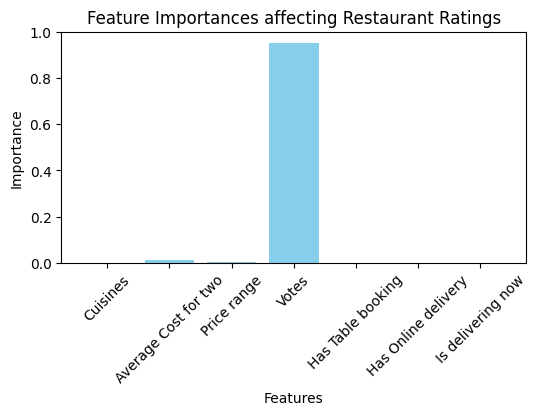

In [15]:
# Plotting feature vs importance graph
plt.figure(figsize=(6, 3))
plt.bar(features, [importance_dict.get(feature, 0.0) for feature in features], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances affecting Restaurant Ratings')
plt.xticks(rotation=45)
plt.show()